Over Complicated Addition Network
==================================

In this version of the network, we will add more layers and a nonlinear activation function. It is still possible for the network to do 'well,' however it is unlikely that we will have the same accuracy as before.

In [3]:
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense

In [4]:
# make a list of 100 pairs from 0-25 for the network to add together
input_data = np.random.randint(25, size=(100,2))
target_data = np.array([x[0] + x[1] for x in input_data])
for ii in range(10):
    a, b = input_data[ii, :]
    ans = target_data[ii]
    print('{0:>2} + {1:>2} = {2:<10}'.format(a,b,ans))

23 +  8 = 31        
 7 +  7 = 14        
18 + 18 = 36        
20 +  8 = 28        
 9 +  6 = 15        
22 + 23 = 45        
24 +  1 = 25        
 6 + 22 = 28        
18 +  2 = 20        
 9 +  8 = 17        


Now that we have our data set, let's split it into training and testing data

In [5]:
train_size = 75

# this is the data we train the network on
x_train = input_data[:train_size, :]
y_train = target_data[:train_size]

# this is the data that we test to see how well we did during training
x_test = input_data[train_size:, :]
y_test = target_data[train_size:]

print('x_train.shape={0}, y_train.shape={1}'.format(x_train.shape, y_train.shape))
print('x_test.shape={0}, y_test.shape={1}'.format(x_test.shape, y_test.shape))

x_train.shape=(75, 2), y_train.shape=(75,)
x_test.shape=(25, 2), y_test.shape=(25,)


Network Architecture
====================
Here we will make some changes relative to the 'addition network' from before. Let us add a few extra layers and increase the size of each one. 

We will also change the linear activation functions to 'tanh' except at the final fully connected output layer.

Lastly, because we have over 100x more weights than before, let's train for 300 epochs instead of 100

In [6]:
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test), batch_size=1)
y_hat = model.predict(x_test)

W0105 07:04:46.384217 139797882320704 deprecation_wrapper.py:119] From /home/rich.ormiston/deepclean_ve/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0105 07:04:46.429897 139797882320704 deprecation_wrapper.py:119] From /home/rich.ormiston/deepclean_ve/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0105 07:04:46.433269 139797882320704 deprecation_wrapper.py:119] From /home/rich.ormiston/deepclean_ve/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0105 07:04:46.518313 139797882320704 deprecation_wrapper.py:119] From /home/rich.ormiston/deepclean_ve/lib/python2.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.comp

Train on 75 samples, validate on 25 samples
Epoch 1/300
75/75 [==============================] - 1s 12ms/step - loss: 579.9628 - val_loss: 544.3325
Epoch 2/300
75/75 [==============================] - 0s 2ms/step - loss: 546.9643 - val_loss: 520.8317
Epoch 3/300
75/75 [==============================] - 0s 2ms/step - loss: 526.4946 - val_loss: 502.2066
Epoch 4/300
75/75 [==============================] - 0s 2ms/step - loss: 509.1533 - val_loss: 485.9089
Epoch 5/300
75/75 [==============================] - 0s 2ms/step - loss: 493.6669 - val_loss: 470.5996
Epoch 6/300
75/75 [==============================] - 0s 2ms/step - loss: 479.1666 - val_loss: 456.9289
Epoch 7/300
75/75 [==============================] - 0s 2ms/step - loss: 465.5330 - val_loss: 443.5462
Epoch 8/300
75/75 [==============================] - 0s 2ms/step - loss: 452.5038 - val_loss: 430.6315
Epoch 9/300
75/75 [==============================] - 0s 2ms/step - loss: 439.9988 - val_loss: 418.3163
Epoch 10/300
75/75 [========

This time, not only did we allow for nonlinear couplings (linear ones are still allowed... taylor expand tanh to see why), but we had far more weights to train. To be precise, we had (2x32) + (32x16) + (16x8) + (8x4) + (4x1) = 740.

Compare this to the 'simple' network which had just 6

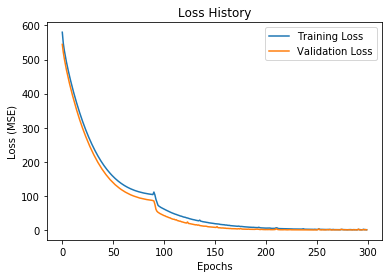

In [7]:
# let's log the loss functions and plot them 
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show('addition_loss.png')
plt.close()

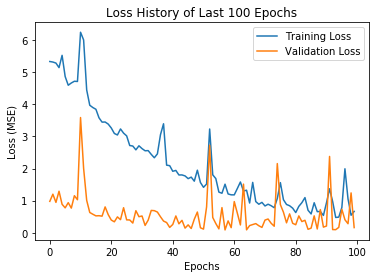

In [8]:
# zoom in on the last 100 epochs
plt.plot(train_loss[-100:], label='Training Loss')
plt.plot(val_loss[-100:], label='Validation Loss')
plt.legend()
plt.title('Loss History of Last 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show('addition_loss_last100.png')
plt.close()

The loss curves certainly leave something to be desired. We certainly are converging, but we are quite a ways above the loss of the simpler network. We also allowed the network to run 3x longer but we still should have trained more. 

You should experiment by changing size and depth of the layers, as well as the activation functions, optimizer and loss.

The gain in time may not seem like a huge cost, but remember, at this point all we are doing is addition with 75 samples. If this example had a few million input samples and attempted to regress an arbitrarily nonlinear and nonstationary curve, it may take many years to converge, if ever.

In [9]:
for ii in range(x_test.shape[0]):
    a, b = x_test[ii, :]
    true_ans = y_test[ii]
    network_ans = y_hat[ii][0]
    print('{0:>2} + {1:>2} = {2:<10}'.format(a,b,network_ans))

12 + 14 = 25.9595508575
23 +  9 = 31.2825260162
21 +  0 = 20.3772602081
 5 + 17 = 21.8673248291
18 +  5 = 22.736656189
 2 + 17 = 18.9791870117
14 + 19 = 32.5126609802
11 + 17 = 27.939748764
 1 + 19 = 20.0146408081
 7 +  4 = 10.988817215
23 +  7 = 29.4123783112
12 + 22 = 33.1201858521
12 +  6 = 17.8019657135
 9 + 12 = 20.9580421448
 4 + 22 = 25.8974533081
 4 +  2 = 6.25728416443
15 + 18 = 32.4535369873
 6 +  1 = 7.01265716553
24 + 13 = 36.7291183472
16 + 24 = 39.2124328613
16 +  8 = 23.8599662781
19 + 13 = 31.430311203
 6 + 18 = 23.7080688477
 1 + 19 = 20.0146408081
 3 +  5 = 7.70134496689


This looks ok... but depending upon the application, it may not suffice to assume that 3 + 5 = 7.70